<a href="https://colab.research.google.com/github/sahilpate3345/deep-learning/blob/main/Forecasting_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
meharshanali_amazon_stocks_2025_path = kagglehub.dataset_download('meharshanali/amazon-stocks-2025')

print('Data source import complete.')


# About Dataset
## Amazon (AMZN) Stock Market Dataset
## Dataset Description
This dataset provides historical stock market data for Amazon (AMZN), one of the world's largest technology companies. The data has been sourced from Yahoo Finance and includes essential stock market attributes, allowing investors, analysts, and data scientists to analyze market trends, volatility, and stock performance.

## Features Included
This dataset contains the following stock attributes:

* Date: The trading date for Amazon stock.
* Open Price: The price at which the stock began trading on a given day.
* High Price: The highest price recorded for the stock during the trading session.
* Low Price: The lowest price recorded for the stock during the trading session.
* Close Price: The final trading price of the stock at the end of the day.
* Volume: The number of shares traded on a specific day.
* Dividends: The amount of dividend issued per share (if any).
* Stock Splits: Information on stock splits that occurred over time.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-stocks-2025/AMZN_stock_data.csv


# Load the CSV file into a DataFrame

In [ ]:
import pandas as pd

csv_file = "/kaggle/input/amazon-stocks-2025/AMZN_stock_data.csv"
df = pd.read_csv(csv_file)

print(df.shape)   # prints number of rows and columns
print(df.head())  # shows first 5 rows







(6987, 8)
                        Date      Open      High       Low     Close  \
0  1997-05-15 00:00:00-04:00  0.121875  0.125000  0.096354  0.097917   
1  1997-05-16 00:00:00-04:00  0.098438  0.098958  0.085417  0.086458   
2  1997-05-19 00:00:00-04:00  0.088021  0.088542  0.081250  0.085417   
3  1997-05-20 00:00:00-04:00  0.086458  0.087500  0.081771  0.081771   
4  1997-05-21 00:00:00-04:00  0.081771  0.082292  0.068750  0.071354   

       Volume  Dividends  Stock Splits  
0  1443120000        0.0           0.0  
1   294000000        0.0           0.0  
2   122136000        0.0           0.0  
3   109344000        0.0           0.0  
4   377064000        0.0           0.0  


# Convert the 'Date' column to datetime format

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], utc=True)

# Calculate the 'Days' column as the difference between each date and the first date

In [ ]:
df['Days'] = (df['Date'] - df['Date'].min()).dt.days

# Display the first few rows of the DataFrame

In [ ]:
df.head()


# Display summary statistics of the DataFram

In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Days,50_MA,200_MA
count,6987.000000,6987.000000,6987.000000,6987.000000,6.987000e+03,6987.0,6987.000000,6987.000000,6938.000000,6788.000000
mean,40.692696,41.165619,40.178290,40.685061,1.360552e+08,0.0,0.003864,5070.732217,40.162338,38.835348
std,58.144182,58.787641,57.435304,58.125169,1.375735e+08,0.0,0.244286,2927.737922,57.060486,54.586099
min,0.070313,0.072396,0.065625,0.069792,9.744000e+06,0.0,0.000000,0.000000,0.088641,0.175827
25%,2.100250,2.148250,2.064250,2.110000,6.298900e+07,0.0,0.000000,2538.500000,2.153710,2.135112
50%,9.041500,9.158500,8.925000,9.021000,1.005360e+08,0.0,0.000000,5069.000000,9.081560,9.340787
75%,72.789249,73.643497,71.504250,73.006500,1.555070e+08,0.0,0.000000,7606.500000,73.436185,62.679312
max,239.020004,242.520004,238.029999,242.059998,2.086584e+09,0.0,20.000000,10144.000000,228.344999,197.994100


# Display information about the DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6987 entries, 1997-05-15 04:00:00+00:00 to 2025-02-21 05:00:00+00:00
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6987 non-null   float64
 1   High          6987 non-null   float64
 2   Low           6987 non-null   float64
 3   Close         6987 non-null   float64
 4   Volume        6987 non-null   int64  
 5   Dividends     6987 non-null   float64
 6   Stock Splits  6987 non-null   float64
 7   Days          6987 non-null   int64  
 8   50_MA         6938 non-null   float64
 9   200_MA        6788 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 600.4 KB


# Check for missing values

In [ ]:
df.isnull().sum()

Open              0
High              0
Low               0
Close             0
Volume            0
Dividends         0
Stock Splits      0
Days              0
50_MA            49
200_MA          199
dtype: int64

# Plotting the closing price over time

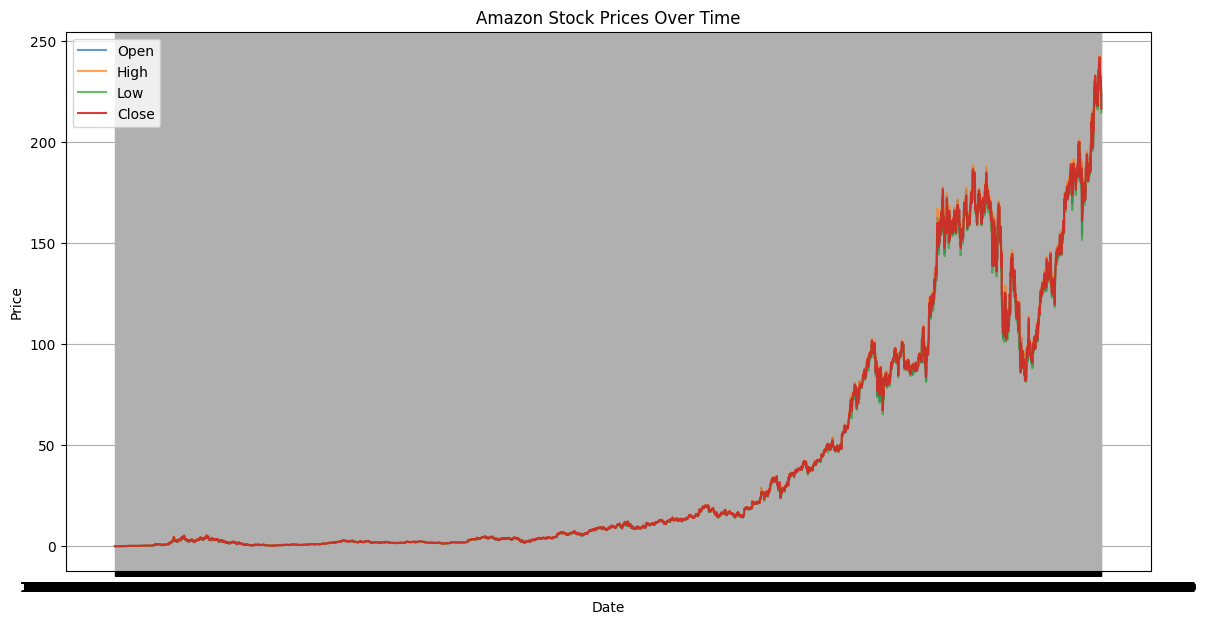

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['Open'], label='Open', alpha=0.7)
plt.plot(df['Date'], df['High'], label='High', alpha=0.7)
plt.plot(df['Date'], df['Low'], label='Low', alpha=0.7)
plt.plot(df['Date'], df['Close'], label='Close', alpha=0.9)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Amazon Stock Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()



# Plotting the volume over time

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Volume'], label='Volume', color='orange')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Amazon Stock Volume Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plotting moving averages

In [ ]:
df['50_MA'] = df['Close'].rolling(window=50).mean()
df['200_MA'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['50_MA'], label='50-Day MA', linestyle='--')
plt.plot(df['Date'], df['200_MA'], label='200-Day MA', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Amazon Stock Closing Price and Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

# Prepare the data for modeling

In [ ]:
import pandas as pd
import os

data_folder = "/kaggle/input/amazon-stocks-2025"
csv_file = os.path.join(data_folder, 'AMZN_stock_data.csv')
df = pd.read_csv(csv_file)

df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df['Date'] = df['Date'].dt.tz_convert(None)
df['Days'] = (df['Date'] - df['Date'].min()).dt.days

df.set_index('Date', inplace=True)
X = df[['Days']]
y = df['Close']


# Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=537)

# Train the model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Make predictions

In [ ]:
y_pred = model.predict(X_test)

# Calculate the mean squared error and R^2 score

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 1167.4763481131138
R^2 Score: 0.6681513206969454


# Predict the next 3 months (90 days)

In [ ]:
future_days = pd.DataFrame(np.arange(df['Days'].max() + 1, df['Days'].max() + 91), columns=['Days'])
future_pred = model.predict(future_days)

# Plot the results

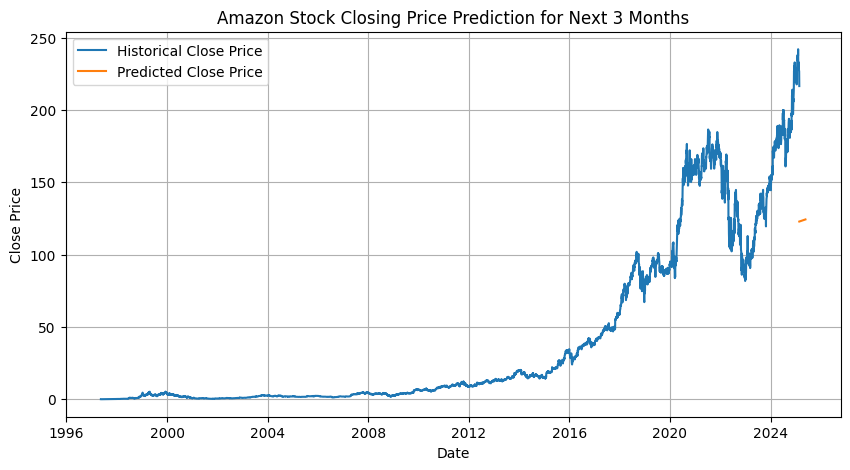

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'], label='Historical Close Price')
plt.plot(pd.date_range(df.index[-1], periods=90, freq='D'), future_pred, label='Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Amazon Stock Closing Price Prediction for Next 3 Months')
plt.legend()
plt.grid(True)
plt.show()

# Print predicted closing prices for the next 3 months

In [ ]:
predicted_dates = pd.date_range(start=df.index[-1], periods=90, freq='D')
predicted_prices = future_pred

for date, price in zip(predicted_dates, predicted_prices):
    print(f'{date.date()}: {price}')

2025-02-21: 122.92458309226316
2025-02-22: 122.9408403594725
2025-02-23: 122.95709762668187
2025-02-24: 122.97335489389121
2025-02-25: 122.98961216110058
2025-02-26: 123.00586942830995
2025-02-27: 123.02212669551929
2025-02-28: 123.03838396272866
2025-03-01: 123.05464122993803
2025-03-02: 123.07089849714737
2025-03-03: 123.08715576435674
2025-03-04: 123.10341303156608
2025-03-05: 123.11967029877545
2025-03-06: 123.13592756598482
2025-03-07: 123.15218483319416
2025-03-08: 123.16844210040352
2025-03-09: 123.1846993676129
2025-03-10: 123.20095663482223
2025-03-11: 123.2172139020316
2025-03-12: 123.23347116924094
2025-03-13: 123.24972843645031
2025-03-14: 123.26598570365968
2025-03-15: 123.28224297086902
2025-03-16: 123.29850023807839
2025-03-17: 123.31475750528773
2025-03-18: 123.3310147724971
2025-03-19: 123.34727203970647
2025-03-20: 123.36352930691581
2025-03-21: 123.37978657412518
2025-03-22: 123.39604384133455
2025-03-23: 123.41230110854389
2025-03-24: 123.42855837575325
2025-03-25: 

# ARIMA model for time series forecasting

In [ ]:
arima_model = ARIMA(df['Close'], order=(5, 1, 0))
arima_result = arima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


# Forecast the next 3 months (90 days)

In [ ]:
arima_forecast = arima_result.forecast(steps=90)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# Plot the ARIMA forecast

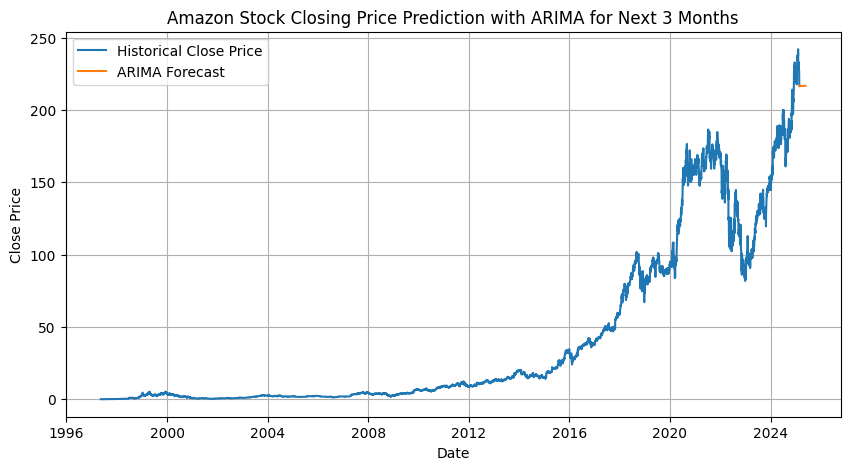

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'], label='Historical Close Price')
plt.plot(pd.date_range(df.index[-1], periods=90, freq='D'), arima_forecast, label='ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Amazon Stock Closing Price Prediction with ARIMA for Next 3 Months')
plt.legend()
plt.grid(True)
plt.show()

# Print ARIMA forecasted closing prices for the next 3 months

In [ ]:
for date, price in zip(predicted_dates, arima_forecast):
    print(f'{date.date()}: {price}')

2025-02-21: 216.68929849810206
2025-02-22: 216.86716146761182
2025-02-23: 216.82460691946602
2025-02-24: 216.6094057990754
2025-02-25: 216.6787616143764
2025-02-26: 216.68738966572133
2025-02-27: 216.68648861008734
2025-02-28: 216.67707517264958
2025-03-01: 216.68202525896183
2025-03-02: 216.68173268006916
2025-03-03: 216.68170632627545
2025-03-04: 216.68126105716448
2025-03-05: 216.68156556893035
2025-03-06: 216.68150558790728
2025-03-07: 216.68151184837052
2025-03-08: 216.68148994135194
2025-03-09: 216.68150784131683
2025-03-10: 216.68150228554114
2025-03-11: 216.68150335659917
2025-03-12: 216.68150217634877
2025-03-13: 216.68150320860187
2025-03-14: 216.6815027881385
2025-03-15: 216.68150289953013
2025-03-16: 216.6815028281777
2025-03-17: 216.68150288793976
2025-03-18: 216.6815028589081
2025-03-19: 216.6815028684468
2025-03-20: 216.68150286371156
2025-03-21: 216.68150286724904
2025-03-22: 216.6815028653362
2025-03-23: 216.6815028660717
2025-03-24: 216.6815028657412
2025-03-25: 216.6